In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import numpy as np
import pandas as pd
import cv2
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

In [4]:

def load_images(image_paths, image_size):
    images = []
    labels = []
    
    for image_path in image_paths:

        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read {image_path}. Skipping.")
            continue
        image = cv2.resize(image, (image_size, image_size))
        image = img_to_array(image)
        image = preprocess_input(image)
        
        images.append(image)
        
        label = image_path.split(os.path.sep)[-2]
        if label in ['dog', 'dogs']:
            labels.append(1)
        elif label in ['cat', 'cats']:
            labels.append(0)
        else:
            print(f"Warning: Unexpected label {label} in path {image_path}. Skipping.")
            continue
    
    return np.array(images), np.array(labels)


dataset_dir = r'C:\Users\numan\OneDrive\Desktop\ByteUprise Internship\Task 3 SVM\datasets'


image_paths = []

for subdir, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(subdir, file))


print(f"Number of images found: {len(image_paths)}")

image_size = 224
images, labels = load_images(image_paths, image_size)

Number of images found: 10028


In [5]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
features = vgg_model.predict(images)
features = features.reshape((features.shape[0], -1))

314/314 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step


In [6]:
from collections import Counter
print("Label distribution in labels:", Counter(labels))

Label distribution in labels: Counter({1: 5017, 0: 5011})


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [8]:
print("Label distribution in y_train:", Counter(y_train))
print("Label distribution in y_test:", Counter(y_test))

Label distribution in y_train: Counter({1: 4027, 0: 3995})
Label distribution in y_test: Counter({0: 1016, 1: 990})


In [9]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.31%


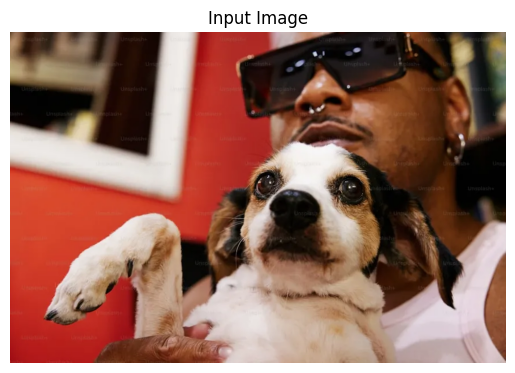

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
The image is predicted to be a Dog.


In [11]:
from matplotlib import pyplot as plt

def predict_image(model, image_path, image_size):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read {image_path}.")
        return None
   
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')
    plt.show()
    
    image = cv2.resize(image, (image_size, image_size))
    image = img_to_array(image)
    image = preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    
    features = vgg_model.predict(image)
    features = features.reshape((features.shape[0], -1))
    
    prediction = model.predict(features)
    return 'Dog' if prediction[0] == 1 else 'Cat'

new_image_path = r'C:\Users\numan\OneDrive\Desktop\ByteUprise Internship\Task 3 SVM\premium_photo-1670513671607-a15caaf818c0.webp' 
if svm_model is not None:
    prediction = predict_image(svm_model, new_image_path, image_size)
    if prediction:
        print(f"The image is predicted to be a {prediction}.")